In [0]:

# Load the pickle file.
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
import os
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
import pickle
import numpy.ma as ma

In [23]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#!ls "/content/drive/My Drive"

In [0]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')



In [0]:
parameters = {'n_estimators':range(500, 1900, 200),'learning_rate':[0.01,0.001,0.0001]}

In [0]:
categories = pickle.load( open( "/content/drive/My Drive/Colab Notebooks/MPII_dataset_label_categories.p", "rb" ) )

In [0]:
dataset = pickle.load( open("/content/drive/My Drive/Colab Notebooks/MPII_dataset.p", "rb" ) )
num_examples = len(dataset)
X = np.reshape(dataset, (num_examples, 32))

print("Classyfying dataset = MPII joins ...")
abc = AdaBoostClassifier()

clf = GridSearchCV(abc, parameters, cv=5,return_train_score=True)
clf.fit(X,categories)
print("Best Score:", clf.best_score_," / Best parameters:", clf.best_params_, "/clf_results: ",clf.cv_results_)

Classyfying dataset = MPII joins ...


In [0]:
#Saved cv_results to avoid running the GridSearch again
cv_results_ = {'mean_fit_time': np.array([ 54.30315042,  75.75153332,  97.3941679 , 119.45081892,
       140.7851253 , 162.50899611, 182.99666119,  53.82593617,
        75.21734209,  96.83112974, 118.2372118 , 140.36338859,
       161.28087273, 183.29340982,  54.1701354 ,  75.62070403,
        97.40009246, 118.84078879, 140.60621076, 162.40588207,
       183.50912085]), 'std_fit_time': np.array([0.25797666, 0.21637478, 0.34738003, 0.32632054, 0.33233407,
       0.24819368, 0.48011587, 0.17959413, 0.28134078, 0.36668809,
       0.37597506, 0.48039781, 0.41724943, 0.83603115, 0.23411701,
       0.26402584, 0.33291373, 0.12770447, 0.09630257, 0.42958737,
       0.56036865]), 'mean_score_time': np.array([2.09542017, 2.93256125, 3.79801588, 4.6500711 , 5.4520752 ,
       6.31652436, 7.10395746, 2.07005544, 2.89694295, 3.72069917,
       4.53364058, 5.40309315, 6.20507717, 7.03494296, 2.0888247 ,
       2.91304965, 3.74982409, 4.57804241, 5.41299968, 6.23326082,
       7.04347768]), 'std_score_time': np.array([0.01036214, 0.02832318, 0.01869056, 0.02496445, 0.01077313,
       0.02769635, 0.03431894, 0.01645464, 0.01840852, 0.02395341,
       0.04550922, 0.02683643, 0.03496212, 0.01066601, 0.01305774,
       0.01036645, 0.023149  , 0.03521946, 0.02948698, 0.05234079,
       0.06038899]), 'param_learning_rate': ma.masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.001, 0.001,
                   0.001, 0.001, 0.001, 0.001, 0.001, 0.0001, 0.0001,
                   0.0001, 0.0001, 0.0001, 0.0001, 0.0001],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': ma.masked_array(data=[500, 700, 900, 1100, 1300, 1500, 1700, 500, 700, 900,
                   1100, 1300, 1500, 1700, 500, 700, 900, 1100, 1300,
                   1500, 1700],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'learning_rate': 0.01, 'n_estimators': 500}, {'learning_rate': 0.01, 'n_estimators': 700}, {'learning_rate': 0.01, 'n_estimators': 900}, {'learning_rate': 0.01, 'n_estimators': 1100}, {'learning_rate': 0.01, 'n_estimators': 1300}, {'learning_rate': 0.01, 'n_estimators': 1500}, {'learning_rate': 0.01, 'n_estimators': 1700}, {'learning_rate': 0.001, 'n_estimators': 500}, {'learning_rate': 0.001, 'n_estimators': 700}, {'learning_rate': 0.001, 'n_estimators': 900}, {'learning_rate': 0.001, 'n_estimators': 1100}, {'learning_rate': 0.001, 'n_estimators': 1300}, {'learning_rate': 0.001, 'n_estimators': 1500}, {'learning_rate': 0.001, 'n_estimators': 1700}, {'learning_rate': 0.0001, 'n_estimators': 500}, {'learning_rate': 0.0001, 'n_estimators': 700}, {'learning_rate': 0.0001, 'n_estimators': 900}, {'learning_rate': 0.0001, 'n_estimators': 1100}, {'learning_rate': 0.0001, 'n_estimators': 1300}, {'learning_rate': 0.0001, 'n_estimators': 1500}, {'learning_rate': 0.0001, 'n_estimators': 1700}], 'split0_test_score': np.array([0.24429576, 0.24481043, 0.24446732, 0.24566821, 0.24721221,
       0.24721221, 0.24652599, 0.24909933, 0.24738377, 0.24789844,
       0.24583977, 0.2425802 , 0.24446732, 0.24223709, 0.24909933,
       0.24909933, 0.24909933, 0.24909933, 0.24909933, 0.24909933,
       0.24909933]), 'split1_test_score': np.array([0.25291695, 0.25326012, 0.25377488, 0.25428964, 0.25531915,
       0.25583391, 0.25566232, 0.26286891, 0.25377488, 0.25188744,
       0.24897049, 0.24416609, 0.24605353, 0.24673988, 0.26201098,
       0.26201098, 0.26201098, 0.26286891, 0.26286891, 0.26286891,
       0.26286891]), 'split2_test_score': np.array([0.22983179, 0.22863028, 0.2279437 , 0.22674219, 0.22622726,
       0.2263989 , 0.22571232, 0.23171988, 0.22897357, 0.22845863,
       0.22777206, 0.22760041, 0.22845863, 0.22914521, 0.22657055,
       0.22657055, 0.22657055, 0.22657055, 0.22657055, 0.23171988,
       0.23171988]), 'split3_test_score': np.array([0.25107407, 0.25141777, 0.25124592, 0.25210517, 0.25347998,
       0.25433923, 0.25279258, 0.2471215 , 0.2471215 , 0.25073037,
       0.25347998, 0.25279258, 0.25210517, 0.25124592, 0.2471215 ,
       0.2471215 , 0.2471215 , 0.2471215 , 0.2471215 , 0.2471215 ,
       0.2471215 ]), 'split4_test_score': np.array([0.24475404, 0.24613003, 0.24613003, 0.24544204, 0.24595803,
       0.24509804, 0.24561404, 0.24716202, 0.24716202, 0.24647403,
       0.24647403, 0.24406605, 0.24406605, 0.24303406, 0.24578603,
       0.24578603, 0.24578603, 0.24578603, 0.24716202, 0.24716202,
       0.24716202]), 'mean_test_score': np.array([0.24457343, 0.24484819, 0.24471081, 0.24484819, 0.24563814,
       0.24577552, 0.24526034, 0.24759582, 0.24488254, 0.24508861,
       0.24450474, 0.24223794, 0.24302789, 0.24247836, 0.24611897,
       0.24611897, 0.24611897, 0.2462907 , 0.24656546, 0.24759582,
       0.24759582]), 'std_test_score': np.array([0.00811702, 0.00870329, 0.00903597, 0.00970413, 0.0103421 ,
       0.01051377, 0.01047875, 0.00988233, 0.00835243, 0.00853905,
       0.00878897, 0.00815911, 0.00783601, 0.00739209, 0.01135866,
       0.01135866, 0.01135866, 0.01160151, 0.0116026 , 0.00988233,
       0.00988233]), 'rank_test_score': np.array([17, 14, 16, 14, 10,  9, 11,  1, 13, 12, 18, 21, 19, 20,  6,  6,  6,
        5,  4,  1,  1], dtype=np.int32), 'split0_train_score': np.array([0.24648946, 0.24631769, 0.24713359, 0.24773479, 0.2479495 ,
       0.24721948, 0.24657534, 0.24721948, 0.24636063, 0.24580238,
       0.24442822, 0.24537295, 0.24584532, 0.24588826, 0.24721948,
       0.24721948, 0.24721948, 0.24721948, 0.24721948, 0.24721948,
       0.24721948]), 'split1_train_score': np.array([0.24287187, 0.24295775, 0.24321539, 0.24261422, 0.24222776,
       0.24179835, 0.24214188, 0.24381656, 0.24317245, 0.24278598,
       0.24317245, 0.24291481, 0.24252834, 0.24239952, 0.241326  ,
       0.241326  , 0.241326  , 0.24381656, 0.24381656, 0.24381656,
       0.24381656]), 'split2_train_score': np.array([0.25139545, 0.25195363, 0.25289824, 0.25337055, 0.25397166,
       0.25470159, 0.2548304 , 0.25161013, 0.25242593, 0.25169601,
       0.25195363, 0.25148132, 0.25126664, 0.25135251, 0.25019322,
       0.25019322, 0.25019322, 0.25019322, 0.25019322, 0.25161013,
       0.25161013]), 'split3_train_score': np.array([0.24436623, 0.2446667 , 0.24479547, 0.24483839, 0.24522471,
       0.24548225, 0.24445208, 0.24775722, 0.24775722, 0.24552517,
       0.24479547, 0.24488132, 0.24436623, 0.24402284, 0.24775722,
       0.24775722, 0.24775722, 0.24775722, 0.24775722, 0.24775722,
       0.24775722]), 'split4_train_score': np.array([0.24564415, 0.24624496, 0.2460733 , 0.24645953, 0.24663119,
       0.24667411, 0.24654536, 0.24774697, 0.24774697, 0.24718908,
       0.24667411, 0.24560124, 0.24534375, 0.2460733 , 0.24538666,
       0.24538666, 0.24538666, 0.24538666, 0.24774697, 0.24774697,
       0.24774697]), 'mean_train_score': np.array([0.24615343, 0.24642814, 0.2468232 , 0.2470035 , 0.24720096,
       0.24717515, 0.24690901, 0.24763007, 0.24749264, 0.24659973,
       0.24620477, 0.24605033, 0.24587005, 0.24594729, 0.24637652,
       0.24637652, 0.24637652, 0.24687463, 0.24734669, 0.24763007,
       0.24763007]), 'std_train_score': np.array([0.00289184, 0.00302401, 0.00330735, 0.00361451, 0.00388241,
       0.00421132, 0.00428379, 0.00247314, 0.00298052, 0.00292077,
       0.00308567, 0.00287591, 0.00292675, 0.00301748, 0.00295539,
       0.00295539, 0.00295539, 0.00216688, 0.00204497, 0.00247314,
       0.00247314])}

range(500, 1900, 200)


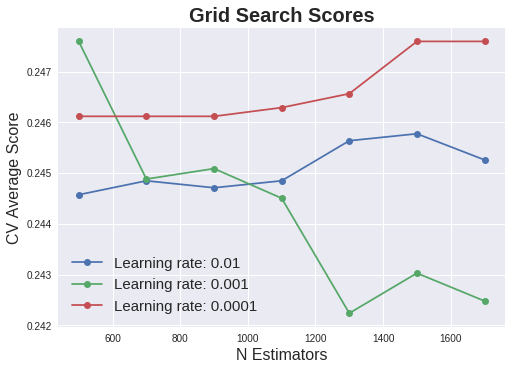

In [20]:
plot_grid_search(cv_results_, parameters['n_estimators'], parameters['learning_rate'], 'N Estimators', 'Learning rate')

In [0]:
distance_euc = pickle.load( open("/content/drive/My Drive/Colab Notebooks/MPII_dataset_euclidean_distance.p", "rb" ) )
num_examples = distance_euc.shape[0]
X = np.reshape(distance_euc, (num_examples, 16*16))

print("Classyfying dataset = euclidean distance ...")
abc = AdaBoostClassifier()

clf = GridSearchCV(abc, parameters, cv=5,return_train_score=True)
clf.fit(X,categories)
print("Best Score:", clf.best_score_," / Best parameters:", clf.best_params_, "/clf_results: ",clf.cv_results_)



In [0]:
plot_grid_search(clf.cv_results_, parameters['n_estimators'], parameters['learning_rate'], 'N Estimators', 'Learning rate')

In [0]:
distance_min_p1 = pickle.load( open( "/content/drive/My Drive/Colab Notebooks/MPII_dataset_minkowski_p1.p", "rb" ) )
num_examples = distance_min_p1.shape[0]
X = np.reshape(distance_min_p1, (num_examples, 16*16))

print("Classyfying dataset = minkowski p=1 ...")

abc = AdaBoostClassifier()

clf = GridSearchCV(abc, parameters, cv=5,return_train_score=True)
clf.fit(X,categories)
print("Best Score:", clf.best_score_," / Best parameters:", clf.best_params_, "/clf_results: ",clf.cv_results_)

In [0]:
plot_grid_search(clf.cv_results_, parameters['n_estimators'], parameters['learning_rate'], 'N Estimators', 'Learning rate')

In [0]:
distance_min_p3 = pickle.load( open( "/content/drive/My Drive/Colab Notebooks/MPII_dataset_minkowski_p3.p", "rb" ) )
num_examples = distance_min_p3.shape[0]
X = np.reshape(distance_min_p3, (num_examples, 16*16))

print("Classyfying dataset = minkowski p=3 ...")

abc = AdaBoostClassifier()

clf = GridSearchCV(abc, parameters, cv=5,return_train_score=True)
clf.fit(X,categories)
print("Best Score:", clf.best_score_," / Best parameters:", clf.best_params_, "/clf_results: ",clf.cv_results_)


In [0]:
plot_grid_search(clf.cv_results_, parameters['n_estimators'], parameters['learning_rate'], 'N Estimators', 'Learning rate')

In [0]:
distance_cos = pickle.load( open( "/content/drive/My Drive/Colab Notebooks/MPII_dataset_cosine.p", "rb" ) )
num_examples = distance_cos.shape[0]
X = np.reshape(distance_cos, (num_examples, 16*16))

print("Classyfying dataset = cosinus ...")

abc = AdaBoostClassifier()

clf = GridSearchCV(abc, parameters, cv=5,return_train_score=True)
clf.fit(X,categories)
print("Best Score:", clf.best_score_," / Best parameters:", clf.best_params_, "/clf_results: ",clf.cv_results_)



In [0]:
plot_grid_search(clf.cv_results_, parameters['n_estimators'], parameters['learning_rate'], 'N Estimators', 'Learning rate')